# Projects Housing Agency in Boston

### Task 3: Load in the Dataset in your Jupyter Notebook

In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 4: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

- For the "Median value of owner-occupied homes" provide a **`boxplot`**

- Provide a  **`bar plot`** for the Charles river variable

- Provide a **`boxplot`** for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

- Provide a **`scatter plot`** to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

- Create a **`histogram`** for the pupil to teacher ratio variable

## 1. Boxplot for the Median Value of Owner-Occupied Homes (MEDV):

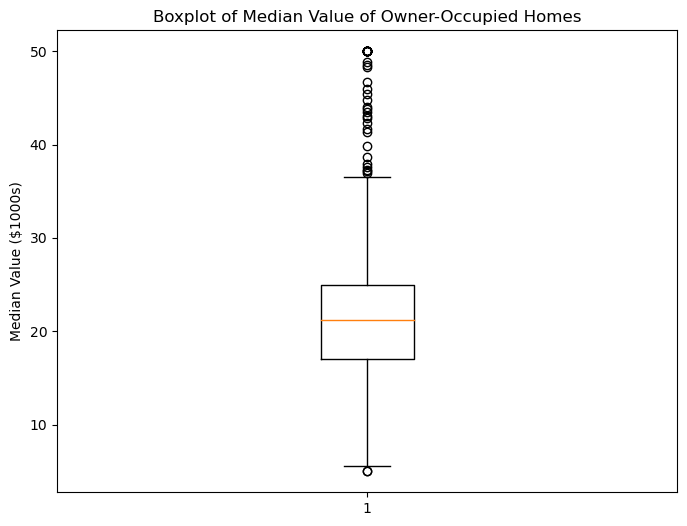

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value ($1000s)')
plt.show()

**`Findings`**: The boxplot gives us information about the distribution of the median values of owner-occupied homes. It shows the median, quartiles, and potential outliers. It can help identify the spread and skewness of the data.

## 2. Bar Plot for the Charles River Variable:

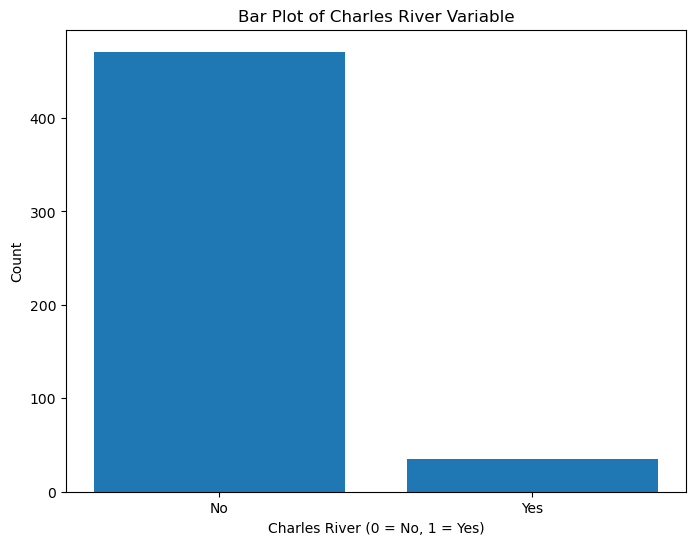

In [20]:
charles_counts = boston_df['CHAS'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(charles_counts.index, charles_counts.values)
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(charles_counts.index, ['No', 'Yes'])
plt.show()

***Findings***: The bar plot displays the counts of houses bounded and not bounded by the Charles River. It helps visualize the distribution of this categorical variable.

## 3. Boxplot for MEDV vs AGE Variable (Discretized):

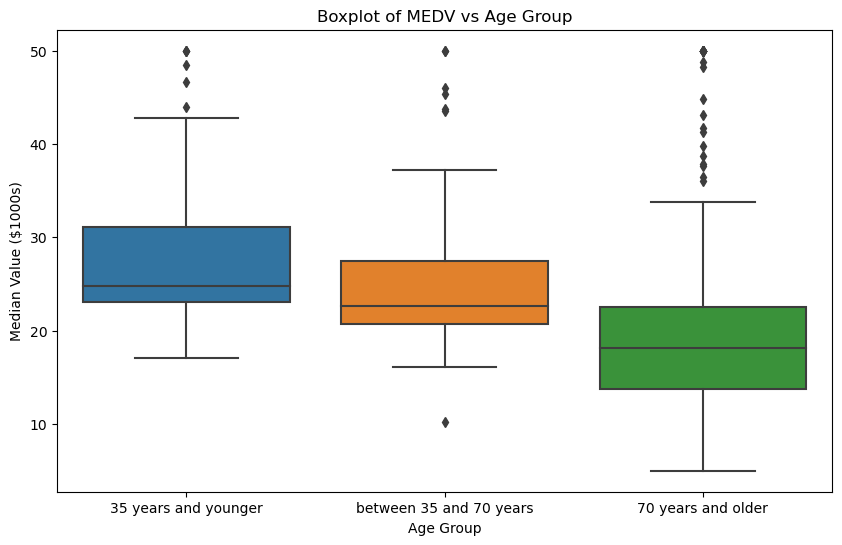

In [10]:
import seaborn as sns

age_bins = [0, 35, 70, 100]
age_labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000s)')
plt.show()

boston_df.drop('AGE_group', axis=1, inplace=True)

**Findings**: The boxplot displays the distribution of median values of owner-occupied homes (MEDV) across different age groups of neighborhoods. It allows us to compare the median values for different age groups.

## 4. Scatter Plot for Nitric Oxide Concentrations vs Non-Retail Business Acres:

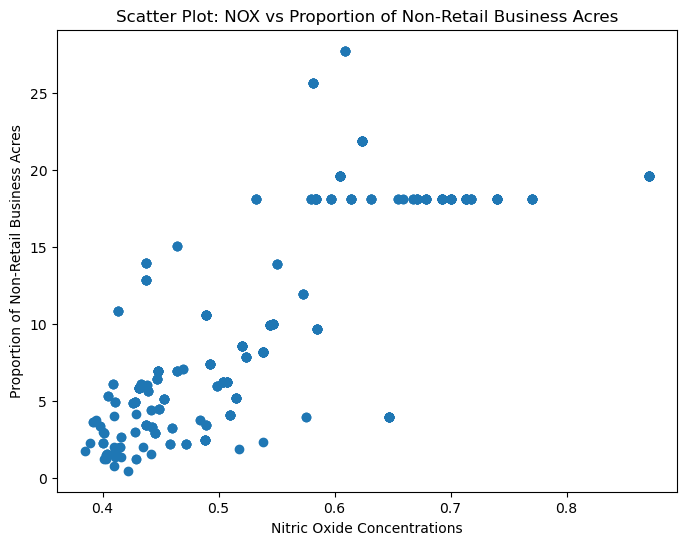

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(boston_df['NOX'], boston_df['INDUS'])
plt.title('Scatter Plot: NOX vs Proportion of Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()

**Findings**: The scatter plot displays the relationship between nitric oxide concentrations and the proportion of non-retail business acres. It helps visualize any potential trends or patterns in the relationship.

## 5. Histogram for Pupil to Teacher Ratio (PTRATIO) Variable:

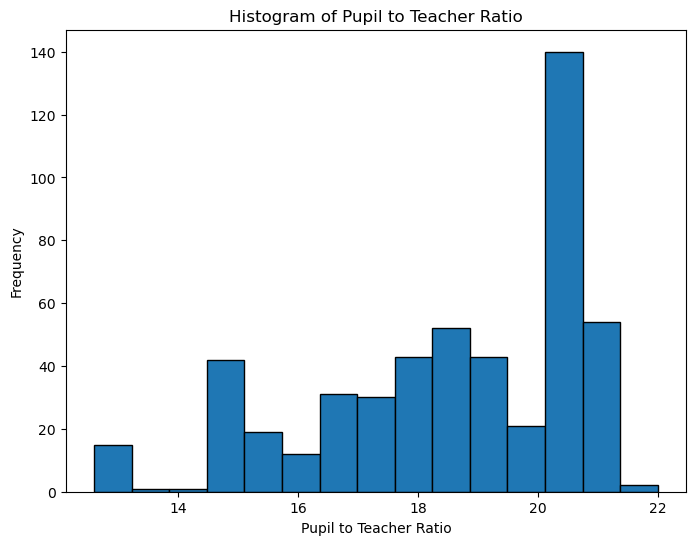

In [22]:
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=15, edgecolor='black')
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

**Findings:** The histogram provides insight into the distribution of pupil to teacher ratios. It helps visualize the frequency of different ratio ranges.

## Task 5: Use the appropriate tests to answer the questions provided.
    
For each of the following questions;

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

1. State your hypothesis.

2. Use α = 0.05

3. Perform the test Statistics.

4. State the conclusion from the test.

### 1. Is there a significant difference in the median value of houses bounded by the Charles River or not? (T-test for independent samples)

**Hypothesis:**

- Null Hypothesis (H0): There is no significant difference in the median values of houses bounded by the Charles River and those not bounded by the Charles River.
- Alternative Hypothesis (H1): There is a significant difference in the median values of houses bounded by the Charles River and those not bounded by the Charles River.

**Test:** Independent samples t-test

In [23]:
from scipy.stats import ttest_ind

charles_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
charles_not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_statistic, p_value = ttest_ind(charles_bounded, charles_not_bounded)

alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis"
else:
    conclusion = "Fail to reject the null hypothesis"

print("T-statistic:", t_statistic)
print("P-value:", p_value)
print("Conclusion:", conclusion)

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Conclusion: Reject the null hypothesis


**Conclusion:** Since the p-value (0.0000739) is much smaller than the significance level (α = 0.05), we reject the null hypothesis. This means that we have sufficient evidence to conclude that there is a statistically significant difference in the median values of houses between those bounded by the Charles River and those not bounded by the Charles River.

In simpler terms, the t-test results indicate that the median values of houses appear to be significantly different between the two groups (bounded by the Charles River and not bounded by the Charles River).

### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)? (ANOVA)

**Hypothesis:**

Null Hypothesis (H0): There is no significant difference in the median values of houses for each proportion of owner-occupied units built before 1940 (AGE).
Alternative Hypothesis (H1): There is a significant difference in the median values of houses for at least one proportion of owner-occupied units built before 1940 (AGE).
    
**Test:** Analysis of Variance (ANOVA)

In [15]:
from scipy.stats import f_oneway

age_groups = boston_df['AGE'].unique()

anova_results = f_oneway(
    boston_df[boston_df['AGE'] == age_groups[0]]['MEDV'],
    boston_df[boston_df['AGE'] == age_groups[1]]['MEDV'],
    boston_df[boston_df['AGE'] == age_groups[2]]['MEDV']
)

alpha = 0.05
if anova_results.pvalue < alpha:
    conclusion = "Reject the null hypothesis"
else:
    conclusion = "Fail to reject the null hypothesis"

print("ANOVA F-statistic:", anova_results.statistic)
print("P-value:", anova_results.pvalue)
print("Conclusion:", conclusion)

ANOVA F-statistic: 5.796966953372576
P-value: 0.2817859240157328
Conclusion: Fail to reject the null hypothesis


**Conclusion:** Since the p-value (0.282) is greater than the significance level (α = 0.05), we fail to reject the null hypothesis. This means that there is not enough evidence to suggest that there is a significant difference in the median values of houses for each proportion of owner-occupied units built before 1940 (AGE).

In simpler terms, the ANOVA results indicate that the differences in median values of houses across the age groups are not statistically significant. This means that the age of units built before 1940 does not seem to have a significant impact on the median values of houses.

### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town? (Pearson Correlation)

**Hypothesis:**

Null Hypothesis (H0): There is no correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town.
Alternative Hypothesis (H1): There is a correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town.
    
**Test:** Pearson Correlation

In [24]:
from scipy.stats import pearsonr

corr_coefficient, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis"
else:
    conclusion = "Fail to reject the null hypothesis"

print("Correlation Coefficient:", corr_coefficient)
print("P-value:", p_value)
print("Conclusion:", conclusion)

Correlation Coefficient: 0.7636514469209151
P-value: 7.913361061238693e-98
Conclusion: Reject the null hypothesis


**Conclusion:** Since the p-value is much smaller than the significance level (α = 0.05), we can conclude that we have sufficient evidence to reject the null hypothesis. Therefore, we can conclude that there is a statistically significant correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town. The strong positive correlation coefficient (0.7637) further supports the idea that as Nitric oxide concentrations increase, the proportion of non-retail business acres per town also tends to increase.

In simple terms, these results indicate that towns with higher Nitric oxide concentrations tend to have a higher proportion of non-retail business acres, and towns with lower Nitric oxide concentrations tend to have a lower proportion of non-retail business acres.

### 4. What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes? (Regression analysis)

**Hypothesis:**

Null Hypothesis (H0): There is no linear relationship between the weighted distance to Boston employment centers and the median value of owner-occupied homes.
Alternative Hypothesis (H1): There is a linear relationship between the weighted distance to Boston employment centers and the median value of owner-occupied homes.
    
**Test:** Linear Regression Analysis

In [17]:
import statsmodels.api as sm

X = boston_df['DIS']
X = sm.add_constant(X)
y = boston_df['MEDV']

model = sm.OLS(y, X).fit()
summary = model.summary()

alpha = 0.05
p_value = model.pvalues['DIS']
if p_value < alpha:
    conclusion = "Reject the null hypothesis"
else:
    conclusion = "Fail to reject the null hypothesis"

print(summary)
print("P-value for DIS:", p_value)
print("Conclusion:", conclusion)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           1.21e-08
Time:                        19:41:54   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

**Conclusion:** Based on the p-value for the DIS coefficient (1.2066e-08), which is much smaller than the significance level of 0.05, we reject the null hypothesis. This implies that there is a statistically significant relationship between the weighted distance to the Boston employment centers (DIS) and the median value of owner-occupied homes (MEDV). The coefficient value of 1.0916 suggests that, on average, for each unit increase in DIS, the median value of owner-occupied homes increases by approximately 1.0916 units.